# WeatherPy
----

### Analysis -- Trend Observations

Trend Observation 1: 
From the "City Latitude vs. Temperature (03/14/2019)" graph, the temperature climbs up quickly when approaching from both side of the polars to the equator; 
also I notice that North Sphere has more data in the chart, we may make an assumption that there are much less cities/countries existed passing the Antarctic Cirlcle (60ish degree) at the South Sphere.

Trend Observation 2: 
From graph "City Latitude vs Humidity (03/14/2019)", although the correlation might seems low, we still can notice that the humidity among cities around equator retain relatively high-humidity, it might be caused by the heat around the equator area. 

Trend Observation 3: 
From graph "City Latitude vs Wind Speed (03/14/2019)", there is barely any correlation between latitude and wind speed; it indicates temperature is just one of the many factors that affecting the Wind Speed.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = pd.DataFrame({"Latitude":lats,"Longitude":lngs}) 

# Identify nearest city for each lat, lng combination
for index,row in lat_lngs.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    lat_lngs.set_value(index,"Closest City name",city.city_name)
    lat_lngs.set_value(index,"Closest Country code",city.country_code.upper())
    
    
# Remove N/A values and duplicate cities
lat_lngs = lat_lngs.dropna()
lat_lngs = lat_lngs.drop_duplicates()

# Picking a sample of 500 cities for analysis
Cities = lat_lngs.sample(600)
Cities = Cities.reset_index()
Cities = Cities.iloc[:,[3,4]]
Cities.head()


C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Closest City name,Closest Country code
0,fortuna,US
1,manono,CD
2,jamestown,SH
3,new norfolk,AU
4,cabedelo,BR


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :api_key,"units":"imperial" }

print("Beginning Data Retrieval")
print("-----------------------------------------\n")

for index,row in Cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(Cities)} | for City,Country: {params['q']}")
    Results = requests.get(url,params)
   # print(Results.url)
    ResultsJson = Results.json()

# bringing values from json results to Cities dataset
    Cities.set_value(index,"Latitude",ResultsJson.get("coord",{}).get("lat"))
    Cities.set_value(index,"Longitude",ResultsJson.get("coord",{}).get("lon"))
    Cities.set_value(index,"Temperature",ResultsJson.get("coord",{}).get("lon"))
    Cities.set_value(index,"Max Temp",ResultsJson.get("main",{}).get("temp_max"))
    Cities.set_value(index,"Wind speed",ResultsJson.get("wind",{}).get("speed"))
    Cities.set_value(index,"Humidity",ResultsJson.get("main",{}).get("humidity"))
    Cities.set_value(index,"Cloudiness",ResultsJson.get("clouds",{}).get("all"))
    Cities.set_value(index,"Date",ResultsJson.get("dt"))

          
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 600 | for City,Country: fortuna,US


C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CY\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .

Processing Record 2 of 600 | for City,Country: manono,CD
Processing Record 3 of 600 | for City,Country: jamestown,SH
Processing Record 4 of 600 | for City,Country: new norfolk,AU
Processing Record 5 of 600 | for City,Country: cabedelo,BR
Processing Record 6 of 600 | for City,Country: chokurdakh,RU
Processing Record 7 of 600 | for City,Country: ushuaia,AR
Processing Record 8 of 600 | for City,Country: vila franca do campo,PT
Processing Record 9 of 600 | for City,Country: butaritari,KI
Processing Record 10 of 600 | for City,Country: rikitea,PF
Processing Record 11 of 600 | for City,Country: cape town,ZA
Processing Record 12 of 600 | for City,Country: saint george,BM
Processing Record 13 of 600 | for City,Country: tsihombe,MG
Processing Record 14 of 600 | for City,Country: new norfolk,AU
Processing Record 15 of 600 | for City,Country: road town,VG
Processing Record 16 of 600 | for City,Country: amderma,RU
Processing Record 17 of 600 | for City,Country: mar del plata,AR
Processing Record 1

Processing Record 140 of 600 | for City,Country: lagoa,PT
Processing Record 141 of 600 | for City,Country: hilo,US
Processing Record 142 of 600 | for City,Country: tasiilaq,GL
Processing Record 143 of 600 | for City,Country: georgetown,SH
Processing Record 144 of 600 | for City,Country: cherskiy,RU
Processing Record 145 of 600 | for City,Country: humaita,BR
Processing Record 146 of 600 | for City,Country: hobart,AU
Processing Record 147 of 600 | for City,Country: shingu,JP
Processing Record 148 of 600 | for City,Country: namibe,AO
Processing Record 149 of 600 | for City,Country: kaitangata,NZ
Processing Record 150 of 600 | for City,Country: kirkuk,IQ
Processing Record 151 of 600 | for City,Country: nemuro,JP
Processing Record 152 of 600 | for City,Country: solnechnyy,RU
Processing Record 153 of 600 | for City,Country: mount isa,AU
Processing Record 154 of 600 | for City,Country: longyearbyen,SJ
Processing Record 155 of 600 | for City,Country: rikitea,PF
Processing Record 156 of 600 | f

Processing Record 275 of 600 | for City,Country: saldanha,ZA
Processing Record 276 of 600 | for City,Country: avarua,CK
Processing Record 277 of 600 | for City,Country: camacha,PT
Processing Record 278 of 600 | for City,Country: castro,CL
Processing Record 279 of 600 | for City,Country: coihaique,CL
Processing Record 280 of 600 | for City,Country: torbay,CA
Processing Record 281 of 600 | for City,Country: marsh harbour,BS
Processing Record 282 of 600 | for City,Country: poum,NC
Processing Record 283 of 600 | for City,Country: alofi,NU
Processing Record 284 of 600 | for City,Country: san carlos de bariloche,AR
Processing Record 285 of 600 | for City,Country: atuona,PF
Processing Record 286 of 600 | for City,Country: kyzyl-suu,KG
Processing Record 287 of 600 | for City,Country: hermanus,ZA
Processing Record 288 of 600 | for City,Country: lompoc,US
Processing Record 289 of 600 | for City,Country: saldanha,ZA
Processing Record 290 of 600 | for City,Country: kostino,RU
Processing Record 291

Processing Record 409 of 600 | for City,Country: boyolangu,ID
Processing Record 410 of 600 | for City,Country: lamu,KE
Processing Record 411 of 600 | for City,Country: ukiah,US
Processing Record 412 of 600 | for City,Country: butaritari,KI
Processing Record 413 of 600 | for City,Country: fort nelson,CA
Processing Record 414 of 600 | for City,Country: saint-philippe,RE
Processing Record 415 of 600 | for City,Country: vaitupu,WF
Processing Record 416 of 600 | for City,Country: nikolskoye,RU
Processing Record 417 of 600 | for City,Country: caravelas,BR
Processing Record 418 of 600 | for City,Country: albany,AU
Processing Record 419 of 600 | for City,Country: sidi ali,DZ
Processing Record 420 of 600 | for City,Country: aanekoski,FI
Processing Record 421 of 600 | for City,Country: butaritari,KI
Processing Record 422 of 600 | for City,Country: chute-aux-outardes,CA
Processing Record 423 of 600 | for City,Country: victoria,SC
Processing Record 424 of 600 | for City,Country: swan river,CA
Proc

Processing Record 542 of 600 | for City,Country: rikitea,PF
Processing Record 543 of 600 | for City,Country: biak,ID
Processing Record 544 of 600 | for City,Country: yar-sale,RU
Processing Record 545 of 600 | for City,Country: saleaula,WS
Processing Record 546 of 600 | for City,Country: rikitea,PF
Processing Record 547 of 600 | for City,Country: hilo,US
Processing Record 548 of 600 | for City,Country: vaini,TO
Processing Record 549 of 600 | for City,Country: urucui,BR
Processing Record 550 of 600 | for City,Country: barentsburg,SJ
Processing Record 551 of 600 | for City,Country: ushuaia,AR
Processing Record 552 of 600 | for City,Country: missao velha,BR
Processing Record 553 of 600 | for City,Country: xuddur,SO
Processing Record 554 of 600 | for City,Country: tasiilaq,GL
Processing Record 555 of 600 | for City,Country: lac du bonnet,CA
Processing Record 556 of 600 | for City,Country: jamestown,SH
Processing Record 557 of 600 | for City,Country: yerbogachen,RU
Processing Record 558 of 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Drop cities that are non-exist
Cities = Cities.dropna()
Cities.head()
# Creat a city weather info dataframe; rename the columns
City_Weather_Data = pd.DataFrame({"City":Cities["Closest City name"],
                         "Cloudiness":Cities["Cloudiness"],
                         "Country":Cities["Closest Country code"],
                         "Date":Cities["Date"],
                         "Humidity":Cities["Humidity"],
                         "Lat":Cities["Latitude"],
                         "Lng":Cities["Longitude"],
                         "Max_Temp":Cities["Max Temp"],
                         "Wind_Speed":Cities["Wind speed"],})

# Save CSV of all data retrieved 
City_Weather_Data.to_csv("Sample_City_Weather_data.csv")

In [5]:
# Display the City Dataa Frame
City_Weather_Data["Date"] = City_Weather_Data["Date"].astype('int')
City_Weather_Data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,fortuna,1.0,US,1552618639,100.0,40.60,-124.16,51.80,10.29
1,manono,64.0,CD,1552618690,92.0,-7.30,27.40,71.30,2.98
2,jamestown,88.0,SH,1552618570,100.0,-15.94,-5.72,76.25,14.05
3,new norfolk,40.0,AU,1552618639,52.0,-42.78,147.06,68.00,13.87
4,cabedelo,20.0,BR,1552615200,94.0,-6.97,-34.84,78.80,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

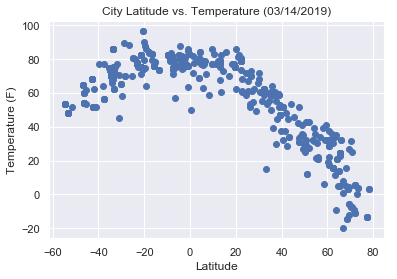

In [7]:
# plot the data in scatter Chart
import seaborn
seaborn.set()

plt.scatter(City_Weather_Data.Lat, City_Weather_Data.Max_Temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (03/14/2019)")

# Save png images for the scatter plot.
plt.savefig("CityLat_vs_MaxTemp_03.14.19.png")
plt.show()

#### Latitude vs. Humidity Plot

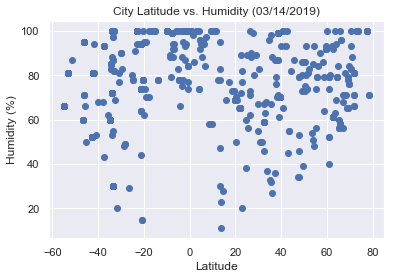

In [8]:
# plot the data in scatter Chart
import seaborn
seaborn.set()

plt.scatter(City_Weather_Data.Lat, City_Weather_Data.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/14/2019)")

# Save png images for the scatter plot.
plt.savefig("CityLat_vs_Humidity_03.14.19.png")
plt.show()

#### Latitude vs. Cloudiness Plot

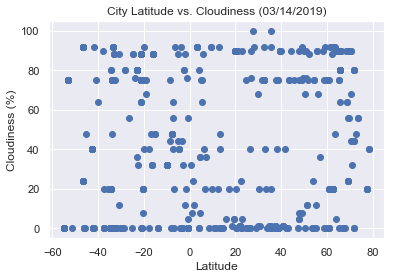

In [9]:
# plot the data in scatter Chart
import seaborn
seaborn.set()

plt.scatter(City_Weather_Data.Lat, City_Weather_Data.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/14/2019)")

# Save png images for the scatter plot.
plt.savefig("CityLat_vs_Cloudiness_03.14.19.png")
plt.show()

#### Latitude vs. Wind Speed Plot

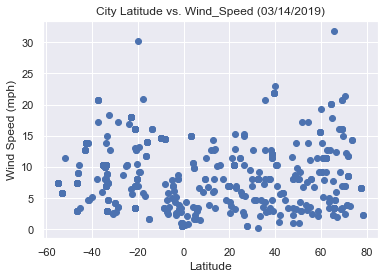

In [10]:
# plot the data in scatter Chart
import seaborn
seaborn.set()

plt.scatter(City_Weather_Data.Lat, City_Weather_Data.Wind_Speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind_Speed (03/14/2019)")

# Save png images for the scatter plot.
plt.savefig("CityLat_vs_WindSpeed_03.14.19.png")
plt.show()